What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

They don't always reflects the real world. They are too balanced in a way and underestimate the influence (size and frequency) of some specific nodes

List the four regimes that characterize random networks as a function of ⟨k⟩.

Subcritical Regime: 0 ‹ ‹k› ‹ 1 (p ‹ 1/N , Image 3.7b).
Supercritical Regime: ‹k› › 1 (p › 1/N , Image 3.7d).
Connected Regime: ‹k› › lnN (p › lnN/N , Image 3.7e).
Critical Point: ‹k› = 1 (p = 1/N , Image 3.7c).

According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

Because then it does not reflect the clustering of the real world (Friend knowing each others friend).

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Generating Graphs
A = nx.watts_strogatz_graph(500,4,0.7)
B = nx.watts_strogatz_graph(500,4,0.01)
C = nx.watts_strogatz_graph(500,4,1)

# Calculating average shortest path length
A_aspl = nx.average_shortest_path_length(A)
B_aspl = nx.average_shortest_path_length(B)
C_aspl = nx.average_shortest_path_length(C)

print(A_aspl, B_aspl, C_aspl)

4.809523046092185 28.553731462925853 4.770677354709419


So the bigger the p the shorter the path are between nodes

p=1 the network is a fully randomized network. Most small network have a small aspl, everyone is connected, everyone knows everyone.

What's the value of p for which the average shortest path length gets close to the fully randomized network ?

When aspl is the biggest ?

In [8]:
D = nx.watts_strogatz_graph(500,4,0.5)
Da = nx.average_shortest_path_length(D)

print(Da)

4.961394789579158


Text(0.5, 0, 'p')

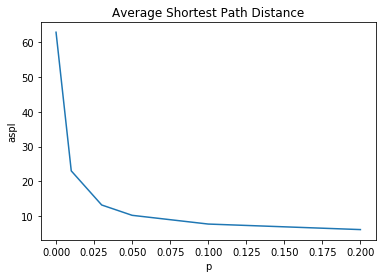

In [9]:
p = [0,0.01,0.03,0.05,0.1,0.2]
aspl = []
aspl_avg = []
aspl_std = []

# 50 networks by p

for i in p:
    for j in range(0,51):
        graph = nx.watts_strogatz_graph(500,4,i)
        aspl.append(nx.average_shortest_path_length(graph))
    aspl_std.append(np.std(aspl))    
    aspl_avg.append(np.mean(aspl))
    aspl = []
    
# Axe settings
axes = plt.gca()
axes.set_xlim([-0.01,0.21])

# Plotting
plt.plot(p, aspl_avg)
plt.errorbar(0.01, 6, xerr=0, yerr=aspl_std[0])
plt.title("Average Shortest Path Distance")
plt.ylabel("aspl")
plt.xlabel("p")

# Part 2: Scale-free networks¶

What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one)

What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


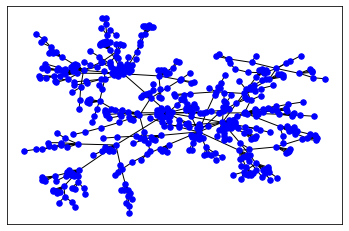

In [10]:
import random

# Initialisation 
n = 500

C = nx.Graph()

C.add_node(1)
C.add_node(2)

C.add_edge(1,2)

# Add a node then select a random one from the existing then link it to the next 

for i in range(2,n+1):
    C.add_node(i)
    # Flatten List of tuples
    all_edges = list(sum(C.edges, ()))
    # Choose a random node
    random_node = random.choice(all_edges)
    C.add_edge(i,random_node)
      
pos = nx.spring_layout(C)

# Drawing
nx.draw_networkx_nodes(C, pos,
                       nodelist= C.nodes,
                       node_color='#0000ff',
                       node_size=30)


nx.draw_networkx_edges(C, pos, edgelist=C.edges, width=1, color="#000000")

Max degree : 28
Min degree : 1


Text(0.5, 0, 'Degree')

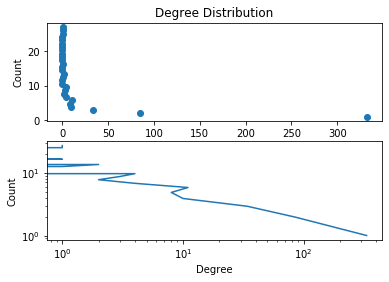

In [11]:
degrees = []

for i in C.degree():
    degrees.append(i[1])

# Finding extremums
dmax = np.amax(degrees)
dmin = np.amin(degrees)

print("Max degree : " + str(dmax))
print("Min degree : " + str(dmin))


hist = np.histogram(degrees, bins=dmax)

x = []
y = []

for h in range(0,dmax):
    x.append(hist[0][h])
    y.append(hist[1][h])
    
# Plot
plt.subplot(211)

plt.scatter(x, y)
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.subplot(212)
plt.loglog(x, y)
plt.ylabel("Count")
plt.xlabel("Degree")

# Friendship Paradox

In [12]:
import random

randomNode = random.choice(list(C.node))

degreeRandomNode = C.degree[randomNode]
print(degreeRandomNode)

neighbors = C.neighbors(randomNode)

print(list(neighbors))

allDegrees = []

for friend in neighbors:
    neighborDegree = C.degree[friend]
    allDegrees.append(neighborDegree)

np.mean(allDegrees)

1
[101]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan